# Introduction
Maps allow us to transform data in a `DataFrame` or `Series` one value at a time for an entire column. However, often we want to group our data, and then do something specific to the group the data is in. We do this with the `groupby` operation.

In these exercises we'll apply groupwise analysis to our dataset.

# Relevant Resources
- [**Grouping Reference and Examples**](https://www.kaggle.com/residentmario/grouping-and-sorting-reference).  
- [Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

# Set Up
Run the code cell below to load the data before running the exercises.

In [18]:
import pandas as pd
from learntools.advanced_pandas.grouping_and_sorting import *

reviews = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
pd.set_option("display.max_rows", 5)

# Checking Your Answers

**Check your answers in each exercise using the  `check_qN` function** (replacing `N` with the number of the exercise). For example here's how you would check an incorrect answer to exercise 1:

In [19]:
check_q1(pd.DataFrame())

False

If you get stuck, **use the `answer_qN` function to see the code with the correct answer.**

For the first set of questions, running the `check_qN` on the correct answer returns `True`.
For the second set of questions, using this function to check a correct answer will present an informative graph!

In [20]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Exercises

**Exercise 1**: Who are the most common wine reviewers in the dataset? Create a `Series` whose index is the `taster_twitter_handle` category from the dataset, and whose values count how many reviews each person wrote.

In [21]:
common_wine_reviewers = reviews.groupby('taster_twitter_handle').taster_twitter_handle.count()
common_wine_reviewers

taster_twitter_handle
@AnneInVino        3685
@JoeCz             5147
                   ... 
@winewchristina       6
@worldwineguys     1005
Name: taster_twitter_handle, Length: 15, dtype: int64

In [22]:
print(check_q1(common_wine_reviewers))
print('-------')
print(answer_q1())

True
-------
reviews.groupby('taster_twitter_handle').taster_twitter_handle.count()
None


**Exercise 2**: What is the best wine I can buy for a given amount of money? Create a `Series` whose index is wine prices and whose values is the maximum number of points a wine costing that much was given in a review. Sort the valeus by price, ascending (so that `4.0` dollars is at the top and `3300.0` dollars is at the bottom).

In [23]:
best_wine = reviews.groupby('price').points.max().sort_index()
best_wine

price
4.0       86
5.0       87
          ..
2500.0    96
3300.0    88
Name: points, Length: 390, dtype: int64

In [24]:
print(check_q2(best_wine))
print('-------')
print(answer_q2())

True
-------
reviews.groupby('price').points.max().sort_index()
None


**Exercise 3**: What are the minimum and maximum prices for each `variety` of wine? Create a `DataFrame` whose index is the `variety` category from the dataset and whose values are the `min` and `max` values thereof.

In [25]:
wine_price_extremes = reviews.groupby(['variety']).price.agg([min, max])
wine_price_extremes

,min,max
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
...,...,...
Çalkarası,19.0,19.0
Žilavka,15.0,15.0


In [26]:
print(check_q3(wine_price_extremes))
print('-------')
print(answer_q3())

True
-------
reviews.groupby('variety').price.agg([min, max])
None


The rest of the exercises are visual.

**Exercise 4**: Are there significant differences in the average scores assigned by the various reviewers? Create a `Series` whose index is reviewers and whose values is the average review score given out by that reviewer. Hint: you will need the `taster_name` and `points` columns.

In [27]:
reviewer_mean_ratings = reviews.groupby('taster_name').points.mean()
reviewer_mean_ratings

taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
                        ...    
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, Length: 19, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
-------
reviews.groupby('taster_name').points.mean()
None


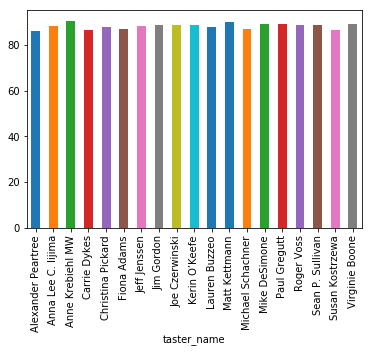

In [28]:
print(check_q4(reviewer_mean_ratings))
print('-------')
print(answer_q4())

**Exercise 5**: What are the most expensive wine varieties? Create a `DataFrame` whose index is wine varieties and whose values are columns with the `min` and the `max` price of wines of this variety. Sort in descending order based on `min` first, `max` second.

In [29]:
wine_price_range = reviews.groupby(['variety']).price.agg([min, max]).sort_values(by=['min', 'max'], ascending=False)
wine_price_range

,min,max
variety,,
Ramisco,495.0,495.0
Terrantez,236.0,236.0
...,...,...
Vital,NaN,NaN
Zelen,NaN,NaN


AxesSubplot(0.125,0.125;0.775x0.755)
-------
reviews.groupby('variety').price.agg([min, max]).sort_values(by=['min', 'max'], ascending=False)
None


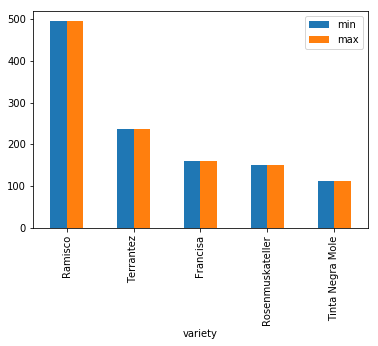

In [30]:
print(check_q5(wine_price_range))
print('-------')
print(answer_q5())

**Exercise 6**: What combination of countries and varieties are most common? Create a `Series` whose index is a `MultiIndex`of `{country, variety}` pairs. For example, a pinot noir produced in the US should map to `{"US", "Pinot Noir"}`. Sort the values in the `Series` in descending order based on wine count.

Hint: first run `reviews['n'] = 0`. Then `groupby` the dataset and run something on the column `n`. You won't need `reset_index`.

In [31]:
reviews['n'] = 0
country_variety_pairs = reviews.groupby(['country', 'variety']).n.count().sort_values(ascending=False)
country_variety_pairs

country    variety           
US         Pinot Noir            9885
           Cabernet Sauvignon    7315
                                 ... 
Italy      Moscato di Noto          1
Argentina  Barbera                  1
Name: n, Length: 1612, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
-------
reviews['n'] = 0
reviews.groupby(['country', 'variety']).n.count().sort_values(ascending=False)
None


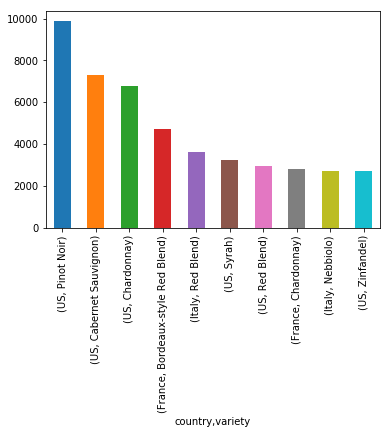

In [32]:
print(check_q6(country_variety_pairs))
print('-------')
print(answer_q6())

# Keep Going

Move on to [**Data types and missing data workbook**](https://www.kaggle.com/kernels/fork/598826).

___
This is part of the [*Learn Pandas*](https://www.kaggle.com/learn/pandas) series.